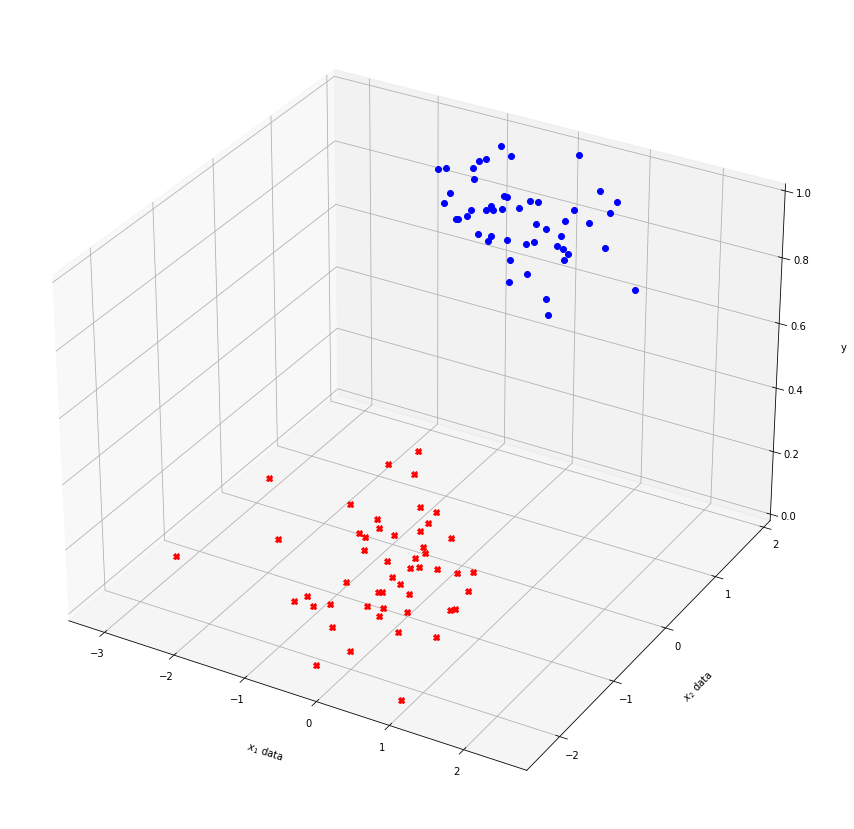

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class mvLoR_dataset_generator:
    def __init__(self, feature_dim, n_sample, noise_factor, direction):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise_factor = noise_factor
        self._direction = direction
        
        self._init_feature_dict()
        self._init_target_theta()
    
    #default로 지정되는 값들 - User가 직접 정의하지 않으면 그대로 쓰임
    def _init_feature_dict(self):
        self._feature_dict = dict()
        for feature_idx in range(1, self._feature_dim + 1):
            x_dict = {'mean':0, 'std':1}
            self._feature_dict[feature_idx] = x_dict
            
    def _init_target_theta(self):
        self._tg_th = [0]+[1 for i in range(self._feature_dim)]
    
    #User가 직접 정의하도록 하는 메서드
    def set_feature_dict(self, feature_dict):
        if len(feature_dict) != self._feature_dim: # len(featue_dict)는 feature_dim + 1이지 않은가...?
            class FeatureDictionaryError(Exception):
                pass
            raise FeatureDictionaryError('The length of "feature_dict" should be equal to "feature_dim"')
            
        else:
            self._feature_dict = feature_dict
            
    def set_target_theta(self, tg_th_list):
        if len(tg_th_list) != len(self._tg_th):
            class TargetThetaError(Exception):
                pass
            raise TargetThetaError('The length of "tg_th_list" should be equal to "featrue_dim + 1"')
            
        else : 
            self._tg_th = tg_th_list
            
    def make_dataset(self):
        x_data = np.zeros(shape = (self._n_sample, 1)) # dataset의 index를 맞추기 위한 dummy column
        y = np.zeros(shape = (self._n_sample, 1))
        
        for feature_idx in range(1, self._feature_dim + 1):
            feature_dict = self._feature_dict[feature_idx]
            data = np.random.normal(loc = feature_dict['mean'], scale = feature_dict['std'],
                                    size = (self._n_sample, 1))
            
            x_data = np.hstack((x_data, data))
            y = y + self._tg_th * data
            
        y = y + self._tg_th[0]
        y_noise = y + self._noise_factor*np.random.normal(0,1,(self._n_sample,1))
        
        if self._direction > 0:
            y_data = (y_noise > 0).astype(np.int)
            
        else:
            y_data = (y_noise < 0).astype(np.int)
            
        data = np.hstack((x_data, y_data))
        return data
    
#------------------------------------------------------------------------------------------------------------------    
    
def dataset_visualizer():
    p_idx = np.where(data[:,-1] > 0)
    np_idx = np.where(data[:,-1] <= 0)
 
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(projection = '3d')
 
    ax.plot(data[p_idx,1].flat, data[p_idx,2].flat, data[p_idx,-1].flat, 'bo')
    ax.plot(data[np_idx,1].flat, data[np_idx,2].flat, data[np_idx,-1].flat, 'rX')
 
    ax.set_xlabel(r'$x_{1}$' + ' data', labelpad = 20)
    ax.set_ylabel(r'$x_{2}$' + ' data', labelpad = 20)
    ax.set_zlabel('y', labelpad = 20)
    
#------------------------------------------------------------------------------------------------------------------    
    
feature_dim = 2
noise_factor = 0.5
direction = 1
n_sample = 100

x_dict = {1:{'mean':0, 'std':1},
          2:{'mean':0, 'std':1}}

tg_th_list = [0,1,3]

mvLoR_data_gen = mvLoR_dataset_generator(feature_dim, n_sample, noise_factor, direction)

mvLoR_data_gen.set_target_theta(tg_th_list)
mvLoR_data_gen.set_feature_dict(x_dict)

data = mvLoR_data_gen.make_dataset()
dataset_visualizer()